In [1]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
DATAPATH = "data/digits.csv"
image_shape=(28,28)

(15, 784)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)


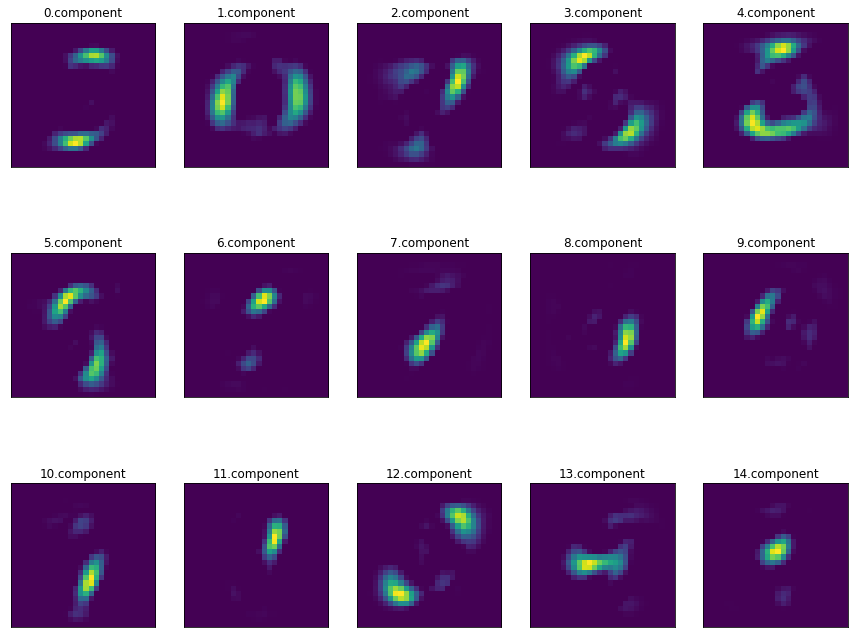

In [4]:
df = pd.read_csv(DATAPATH)
#df_s = df.sort_values('label')
y = df["label"].values
labels = df["label"] 
X = df.drop("label",axis=1).values/255
org_X = df.drop("label",axis=1)
#print(df.head())
#print(df.shape)
#print(y)
#print(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
nmf = NMF(n_components=15,random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)
fix, axes = plt.subplots(3,5,figsize=(15,12),
                        subplot_kw={"xticks":(),"yticks":()})
print(nmf.components_.shape)
for i, (component,ax) in enumerate(zip(nmf.components_,axes.ravel())):
    print(component.shape)
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}.component".format(i))

Text(0.5,0,'t-SNE feature 1')

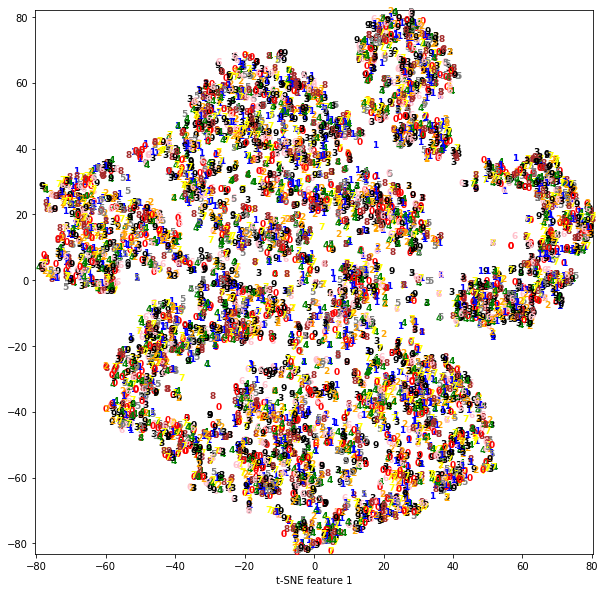

In [3]:
colors = ["red","blue","orange","black","green",
          "gray", "pink","yellow","brown","black"]
tsne = TSNE(random_state=42)
mnist_tsne = tsne.fit_transform(X_train_nmf)
plt.figure(figsize=(10,10))
plt.xlim(mnist_tsne[:,0].min(),mnist_tsne[:,0].max() + 1)
plt.ylim(mnist_tsne[:,1].min(),mnist_tsne[:,1].max() + 1)
for i in range(len(X_train_nmf)):
    plt.text(mnist_tsne[i,0],mnist_tsne[i,1],str(y[i]),
            color=colors[int(y[i])],
            fontdict={"weight":"bold","size":9})
plt.xlabel("t-SNE feature 0")
plt.xlabel("t-SNE feature 1")

In [4]:
#parameters = {"C":[1,10,100,1000],"gamma":[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]}
parameters = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.001, 0.0001]},
    {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [2, 3, 4], 'gamma': [0.001, 0.0001]},
    {'C': [1, 10, 100, 1000], 'kernel': ['sigmoid'], 'gamma': [0.001, 0.0001]}
    ]
clf = svm.SVC(parameters)


clf = GridSearchCV(clf, parameters, verbose=2,n_jobs=-1)
clf.fit(X_train_nmf,y_train)
test_score = clf.score(X_test_nmf,y_test)
y_pred = clf.predict(X_test_nmf)
print(test_score)
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=["0","1","2","3","4","5","6","7","8","9"]))
print(metrics.confusion_matrix(y_test, y_pred, labels=range(10)))

Fitting 3 folds for each of 44 candidates, totalling 132 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:  5.9min finished


0.8485
             precision    recall  f1-score   support

          0       0.95      0.94      0.94       206
          1       0.90      0.98      0.94       212
          2       0.75      0.81      0.78       185
          3       0.83      0.83      0.83       210
          4       0.74      0.81      0.77       180
          5       0.81      0.80      0.81       174
          6       0.90      0.89      0.89       203
          7       0.93      0.89      0.91       225
          8       0.88      0.77      0.82       193
          9       0.78      0.75      0.76       212

avg / total       0.85      0.85      0.85      2000

[[193   0   6   1   2   2   2   0   0   0]
 [  0 207   1   2   0   0   1   0   1   0]
 [  2   3 150   5   7   0  10   2   6   0]
 [  2   2   7 175   0  15   1   0   4   4]
 [  0   0   4   0 146   1   0   2   0  27]
 [  1   4   3  12   4 140   4   0   2   4]
 [  4   1  10   0   2   5 180   0   1   0]
 [  0   5   5   0   8   0   0 200   1   6]
 [  0   3 

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15,random_state=0)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
parameters = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.001, 0.0001]},
    {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [2, 3, 4], 'gamma': [0.001, 0.0001]},
    {'C': [1, 10, 100, 1000], 'kernel': ['sigmoid'], 'gamma': [0.001, 0.0001]}
    ]
clf = svm.SVC(parameters)


clf = GridSearchCV(clf, parameters, verbose=2,n_jobs=-1)
clf.fit(X_train_pca,y_train)
test_score = clf.score(X_test_pca,y_test)
y_pred_pca = clf.predict(X_test_pca)
print(test_score)
print(metrics.classification_report(y_test, y_pred_pca, 
                                    target_names=["0","1","2","3","4","5","6","7","8","9"]))
print(metrics.confusion_matrix(y_test, y_pred_pca, labels=range(10)))

Fitting 3 folds for each of 44 candidates, totalling 132 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 132 out of 132 | elapsed:  5.3min finished


0.9435
             precision    recall  f1-score   support

          0       0.99      0.96      0.98       206
          1       0.97      0.98      0.97       212
          2       0.92      0.96      0.94       185
          3       0.92      0.92      0.92       210
          4       0.92      0.94      0.93       180
          5       0.93      0.94      0.93       174
          6       0.96      0.97      0.97       203
          7       0.96      0.93      0.95       225
          8       0.93      0.95      0.94       193
          9       0.93      0.89      0.91       212

avg / total       0.94      0.94      0.94      2000

[[198   0   1   0   2   0   4   0   0   1]
 [  0 207   1   2   0   0   0   1   1   0]
 [  0   2 177   2   1   0   0   2   1   0]
 [  1   0   4 193   0   6   1   0   4   1]
 [  0   0   0   0 170   0   0   0   1   9]
 [  0   0   0   4   0 164   2   0   3   1]
 [  1   0   2   0   0   2 197   0   1   0]
 [  0   1   5   3   2   1   1 209   1   2]
 [  0   2 

Text(0.5,0,'t-SNE feature 1')

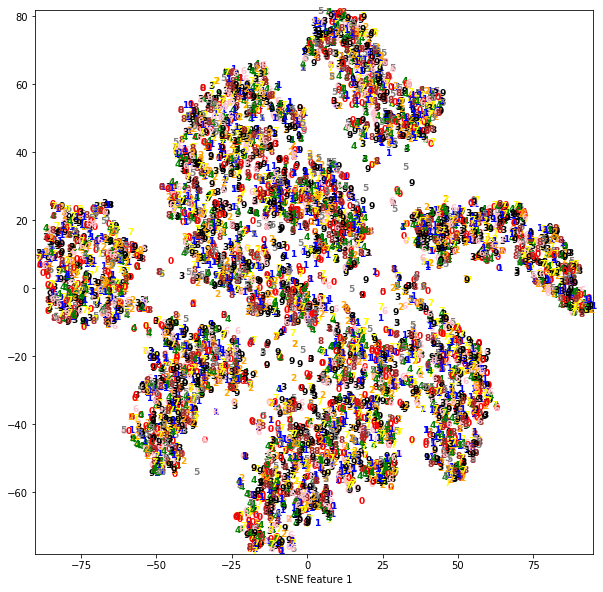

In [6]:
mnist_tsne_pca = tsne.fit_transform(X_train_pca)
plt.figure(figsize=(10,10))
plt.xlim(mnist_tsne_pca[:,0].min(),mnist_tsne_pca[:,0].max() + 1)
plt.ylim(mnist_tsne_pca[:,1].min(),mnist_tsne_pca[:,1].max() + 1)
for i in range(len(X_train_pca)):
    plt.text(mnist_tsne_pca[i,0],mnist_tsne_pca[i,1],str(y[i]),
            color=colors[int(y[i])],
            fontdict={"weight":"bold","size":9})
plt.xlabel("t-SNE feature 0")
plt.xlabel("t-SNE feature 1")

In [7]:
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Best estimator found by grid search:
SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [ ]:
E_list = np.zeros(784)
cumsum_explained = np.zeros(784)
for i in range(1,784):
    pca = PCA(n_components = i)  # 主成分分析オブジェクトの作成
    pca.fit(X_train)                       # 主成分分析の実行
    transformed = pca.transform(X_train)   # データに対して削減後のベクトルを生成
    E = pca.explained_variance_ratio_        # 寄与率
    cumsum_explained[i] = np.cumsum(E)[::-1][0]
    print(cumsum_explained[i])
plt.plot(cumsum_explained)
plt.show()

0.09672729109781777
0.16865033929106651
0.23088653704186457
0.285136696295453
0.3331112361392131
0.3758457642632836
0.4082673343253022
0.43710735078162977
0.46521473089899884
0.4884760641169379
0.5097480668494523
0.5298699424755489
0.5473264556866356
0.5644036394098294
0.5803798798590364
0.5950408949486229
0.608297302978449
0.6212060504187751
0.6330451031518116
0.6447870583522808
0.655822157287137
0.6661112772045042
0.675862710622337
0.685068203780323
0.6939157891846668
0.7023608522750004
0.7105951098591069
0.7183458411790729
0.7255987686508725
0.7324519869483207
0.7392264405449247
0.7457364602399938
0.7518617684339178
0.7577673738068841
0.7633020957198288
0.7686993824335283
0.7737875958536315
0.7787305646436259
0.7835375302142709
0.7881159079884329
0.7926303908647265
0.7969825451506147
0.8012442893818257
0.8052059622393493
0.8090710226713896
0.8128516807094265
0.8164344344543684
0.819890801261176
0.8233129591022513
0.8265090886960568
0.8296853235203583
0.8328052479671142
0.83577088007

0.9977786956693334
0.9978142640084955
0.9978518404344147
0.9978865923859864
0.9979222358340014
0.9979573142860185
0.9979908911787526
0.9980257596769934
0.9980590621303618
0.9980929388910744
0.9981250614468199
0.998157168042536
0.9981888094156692
0.9982189159277437
0.9982524778573201
0.9982794925189493
0.9983108607237466
0.9983398686489614
0.9983694111327027
0.9983993423303302
0.9984298179317663
0.9984560073605184
0.9984858895625489
0.998512686464086
0.9985392034903466
0.9985654519588034
0.9985917109283284
0.9986210606485644
0.9986439569367622
0.9986665413887951
0.9986950537098894
0.9987197569062828
0.9987402320673037
0.9987650300678111
0.9987887100657818
0.9988115670454185
0.9988341862341783
0.9988546371987629
0.9988774360700701
0.9988982711960593
0.998920260823285
0.9989402479652031
0.9989594463793839
0.9989818966483266
0.9990032977061332
0.9990205782075156
0.9990405958020453
0.9990589751090522
0.9990793269294821
0.999097914274881
0.9991143215894567
0.9991323860082846
0.99915072834600

In [10]:
for counter,i in enumerate(cumsum_explained):
    if i == 0.9999999999999993:
        print(counter)
        break        

665


In [ ]:
pca = PCA(n_components = i)  # 主成分分析オブジェクトの作成
pca.fit(X)                       # 主成分分析の実行
transformed = pca.transform(X)   # データに対して削減後のベクトルを生成
